In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [35]:
from sklearn.utils import resample

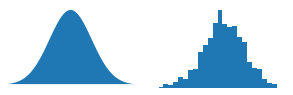

In [6]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = st.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, st.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

### 1. Central Limit Theorem

In [12]:
loans_income = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv", squeeze=True)
loans_income.head(2)

0    67000
1    52000
Name: x, dtype: int64

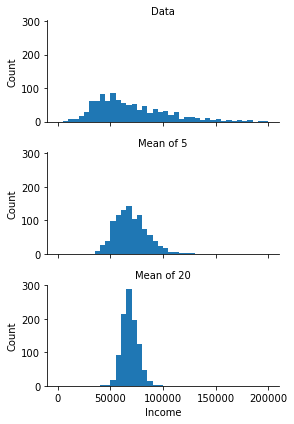

In [15]:

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

In [51]:
results = []
sample_loans_inc = loans_income.sample(20000)

for nrepeat in range(1000):
    sample = resample(sample_loans_inc, replace=True)
    results.append(sample.median())

results = pd.Series(results)
print("Bootstrap Statistics: ")
print(f"Original: {loans_income.median()}")
print(f"Bias: {results.mean() - loans_income.median()}")
print(f"Std. Error: {results.std()}")

Bootstrap Statistics: 
Original: 62000.0
Bias: -120.82100000000355
Std. Error: 350.29234888687944


Origianl Estimate of median is \\$62,000. The bootStrap distribution indicates that the estimate has a bias of about -\\$86 and standard error of \\$231. The results will vary slightly between consecutive runs of this algorithm.

(array([  9.,  34., 106., 180., 238., 208., 134.,  69.,  17.,   5.]),
 array([67318.6446 , 67621.33652, 67924.02844, 68226.72036, 68529.41228,
        68832.1042 , 69134.79612, 69437.48804, 69740.17996, 70042.87188,
        70345.5638 ]),
 <BarContainer object of 10 artists>)

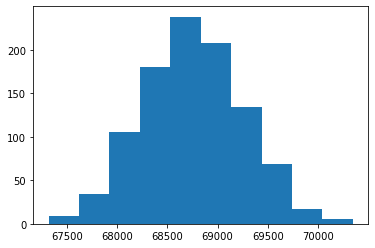

In [47]:
plt.hist(results)